# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

### Описание проекта

Заказчик этого исследования — сеть отелей «Как в гостях». 
Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.
Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

### Бизнес-метрика и другие данные

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. 


В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 
Стоимость номеров отеля:
- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.


В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.


На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

### Инструкция по выполнению

Шаг 1. Откройте файлы с данными
Пути к файлам: 
/datasets/hotel_train.csv — данные для обучения модели.
Скачать датасет
/datasets/hotel_test.csv — данные для тестирования модели.
Скачать датасет


Шаг 2. Предобработка и исследовательский анализ данных
Проверьте данные и откорректируйте их, если потребуется.
Проведите исследовательский анализ представленных данных. Опишите найденные особенности: пропуски, выбросы.


Шаг 3. Вычислите бизнес-метрику
Оцените прибыль отеля без внедрения депозитов.


Шаг 4. Разработка модели ML
Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.
Выберите метрику для обучения.
Оцените прибыль, которую принесёт выбранная модель за год.


Шаг 5. Выявите признаки «ненадёжного» клиента
На основе исследовательского анализа данных опишите клиента, склонного к отказу от брони.


Шаг 6. Напишите общий вывод
Опишите модель, которая решает задачу с наибольшей выгодой для бизнеса. Дайте бизнесу рекомендации по результатам проделанной работы.

### Описание данных

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:


- id — номер записи;
- adults — количество взрослых постояльцев;
- arrival_date_year — год заезда;
- arrival_date_month — месяц заезда;
- arrival_date_week_number — неделя заезда;
- arrival_date_day_of_month — день заезда;
- babies — количество младенцев;
- booking_changes — количество изменений параметров заказа;
- children — количество детей от 3 до 14 лет;
- country — гражданство постояльца;
- customer_type — тип заказчика: 
    - Contract — договор с юридическим лицом;
    - Group — групповой заезд;
    - Transient — не связано с договором или групповым заездом;
    - Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- days_in_waiting_list — сколько дней заказ ожидал подтверждения;
- distribution_channel — канал дистрибуции заказа;
- is_canceled — отмена заказа;
- is_repeated_guest — признак того, что гость бронирует номер второй раз;
- lead_time — количество дней между датой бронирования и датой прибытия;
- meal — опции заказа: 
    - SC — нет дополнительных опций;
    - BB — включён завтрак;
    - HB — включён завтрак и обед;
    - FB — включён завтрак, обед и ужин.
- previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
- previous_cancellations — количество отменённых заказов у клиента;
- required_car_parking_spaces — необходимость места для автомобиля;
- reserved_room_type — тип забронированной комнаты;
- stays_in_weekend_nights — количество ночей в выходные дни;
- stays_in_week_nights — количество ночей в будние дни;
- total_nights — общее количество ночей;
- total_of_special_requests — количество специальных отметок.

### Шаг 1. Откройте файлы с данными

In [89]:
import pandas as pd
import seaborn as sns
import numpy as np

In [90]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_train.csv')
test_df = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_test.csv')

In [91]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


In [92]:
print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


### Шаг 2. Предобработка и исследовательский анализ данных

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,65229.0,43544.069172,25614.858971,0.0,19108.0,40554.0,67414.0,84121.0
is_canceled,65229.0,0.368609,0.482431,0.0,0.0,0.0,1.0,1.0
lead_time,65229.0,96.337917,96.127545,0.0,17.0,64.0,151.0,374.0
arrival_date_year,65229.0,2015.719021,0.449481,2015.0,2015.0,2016.0,2016.0,2016.0
arrival_date_week_number,65229.0,31.339772,13.464024,1.0,21.0,34.0,42.0,53.0
arrival_date_day_of_month,65229.0,15.847813,8.748182,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,65229.0,0.825185,0.853477,0.0,0.0,1.0,2.0,4.0
stays_in_week_nights,65229.0,2.224793,1.354992,0.0,1.0,2.0,3.0,6.0
adults,65229.0,1.836576,0.480245,0.0,2.0,2.0,2.0,4.0
children,65229.0,0.074890,0.334243,0.0,0.0,0.0,0.0,3.0


In [94]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,32412.0,60131.505183,29953.586177,6086.0,45291.75,53394.5,89800.25,97903.0
is_canceled,32412.0,0.388467,0.487409,0.0,0.00,0.0,1.00,1.0
lead_time,32412.0,97.587869,86.507146,0.0,23.00,76.0,155.00,373.0
arrival_date_year,32412.0,2017.000000,0.000000,2017.0,2017.00,2017.0,2017.00,2017.0
arrival_date_week_number,32412.0,17.804054,9.177384,1.0,10.00,18.0,25.00,35.0
arrival_date_day_of_month,32412.0,15.656948,8.766429,1.0,8.00,15.5,23.00,31.0
stays_in_weekend_nights,32412.0,0.867888,0.853394,0.0,0.00,1.0,2.00,4.0
stays_in_week_nights,32412.0,2.340090,1.375170,0.0,1.00,2.0,3.00,6.0
adults,32412.0,1.858602,0.489341,0.0,2.00,2.0,2.00,4.0
children,32412.0,0.083765,0.343470,0.0,0.00,0.0,0.00,3.0


In [95]:
print('Дубликаты обучающих данных:', df.duplicated().sum())
print('Дубликаты тестовых данных:', test_df.duplicated().sum())

Дубликаты обучающих данных: 0
Дубликаты тестовых данных: 0


In [96]:
print('Количество уникальных обучающих данных:', df.nunique())
print('Количество уникальных тестовых данных:', test_df.nunique())

Количество уникальных обучающих данных: id                                65229
is_canceled                           2
lead_time                           369
arrival_date_year                     2
arrival_date_month                   12
arrival_date_week_number             53
arrival_date_day_of_month            31
stays_in_weekend_nights               5
stays_in_week_nights                  7
adults                                5
children                              4
babies                                5
meal                                  5
country                             155
distribution_channel                  4
is_repeated_guest                     2
previous_cancellations               15
previous_bookings_not_canceled       58
reserved_room_type                    7
booking_changes                      16
days_in_waiting_list                 97
customer_type                         4
required_car_parking_spaces           4
total_of_special_requests             6


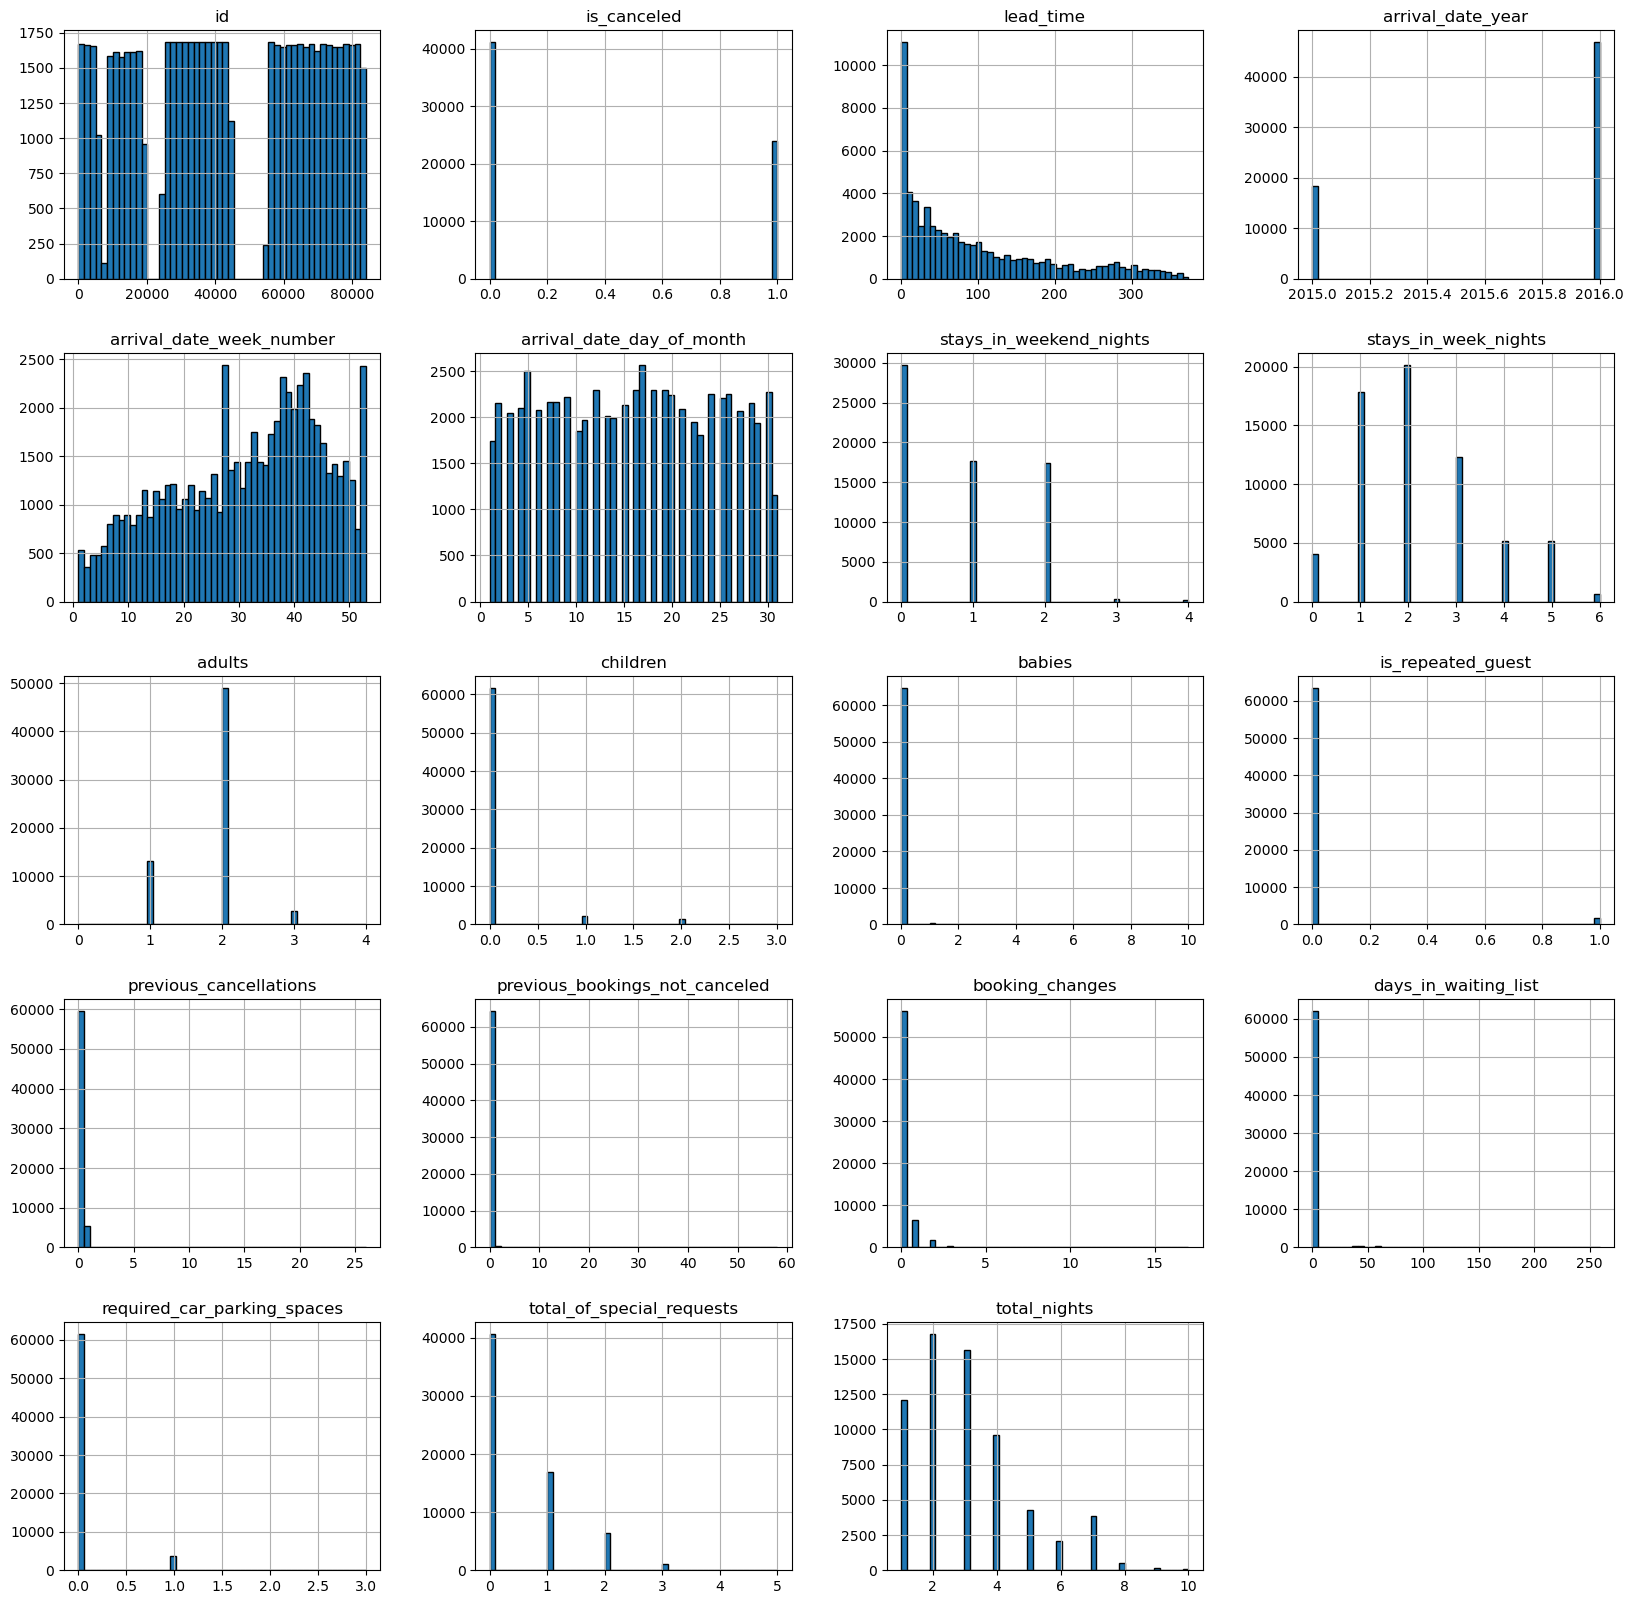

In [97]:
df.hist(bins=50, figsize=(20, 20), edgecolor='black');

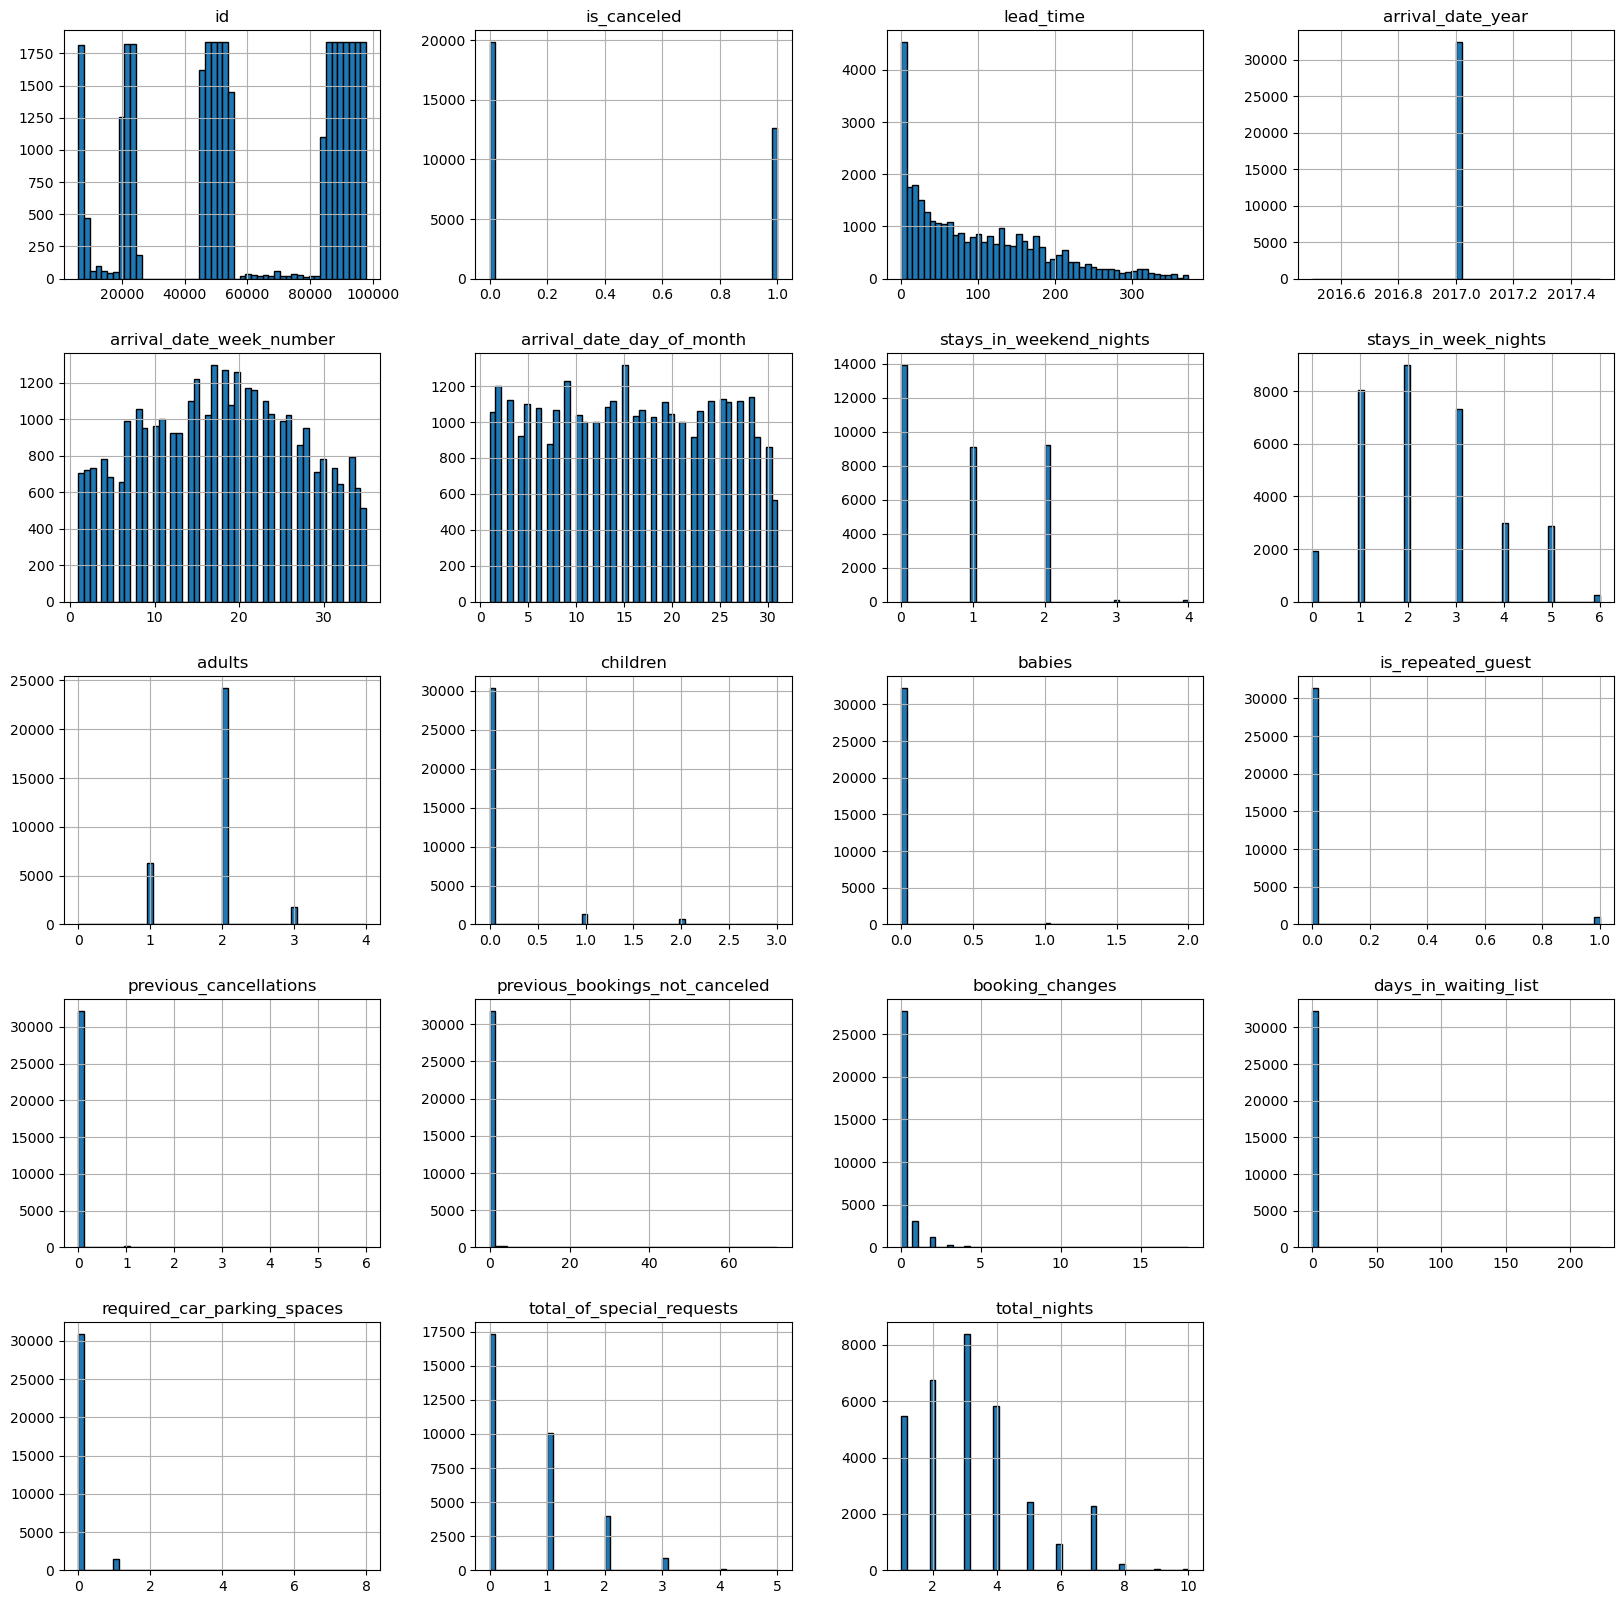

In [98]:
test_df.hist(bins=50, figsize=(20, 20), edgecolor='black');

In [99]:
df = df.drop('id', axis=1)
test_df = test_df.drop('id', axis=1)

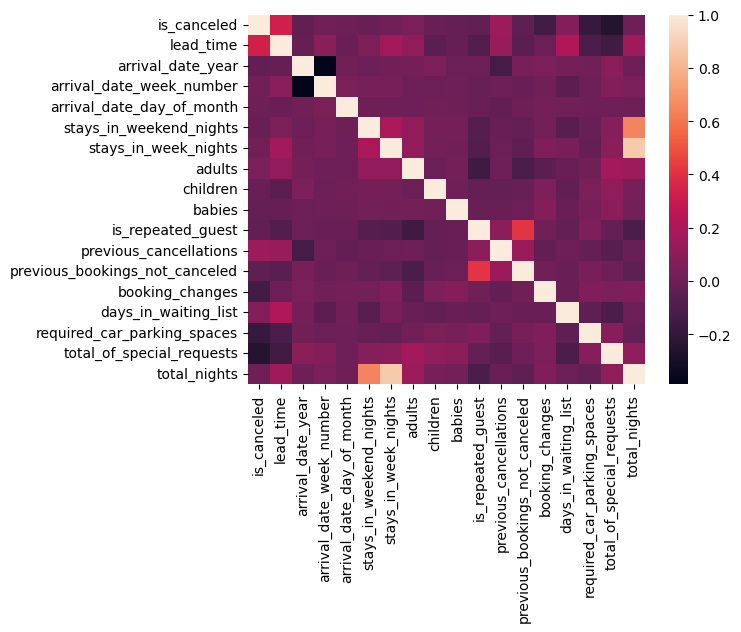

In [100]:
sns.heatmap(df.corr());

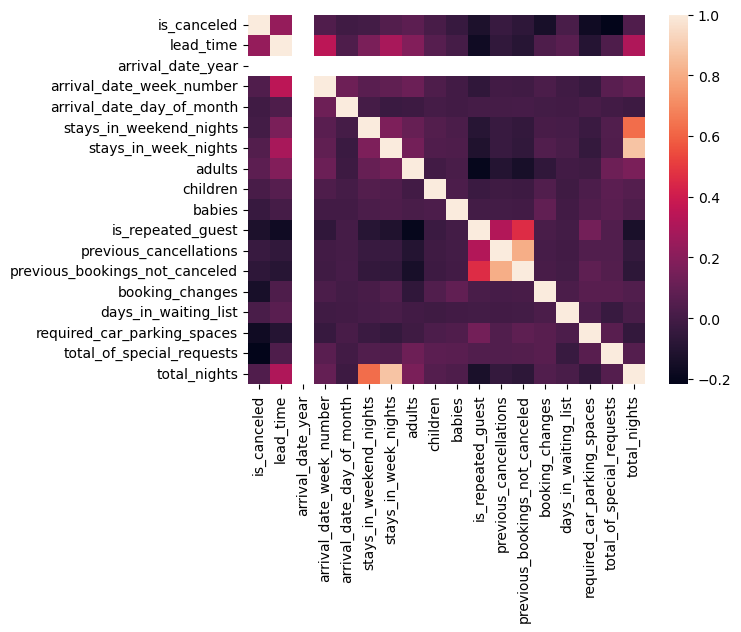

In [101]:
sns.heatmap(test_df.corr());

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

In [102]:
print(df['arrival_date_year'].unique())
print(test_df['arrival_date_year'].unique())

[2015 2016]
[2017]


В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 
Стоимость номеров отеля:
- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.


На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

In [103]:
revenue_df = df

In [104]:
print(revenue_df['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [105]:
def revenue_type(room_type):
    if 'A' in room_type:
        return 1000
    elif 'B' in room_type:
        return 800
    elif 'C' in room_type:
        return 600
    elif 'D' in room_type:
        return 550
    elif 'E' in room_type:
        return 500
    elif 'F' in room_type:
        return 450
    elif 'G' in room_type:
        return 350

In [106]:
def season_rate(month):
    if 'June' in month or 'July' in month or 'August' in month:
        return 1.4
    elif 'December' in month or 'January' in month or 'February' in month:
        return 1
    else:
        return 1.2

In [107]:
def cleaning_coasts(room_type):
    if 'A' in room_type:
        return 400
    elif 'B' in room_type:
        return 350
    elif 'C' in room_type:
        return 350
    elif 'D' in room_type:
        return 150
    elif 'E' in room_type:
        return 150
    elif 'F' in room_type:
        return 150
    elif 'G' in room_type:
        return 150

In [114]:
revenue_df['type_revenue'] = df['reserved_room_type'].apply(revenue_type)
revenue_df['month_rate'] = df['arrival_date_month'].apply(season_rate)
revenue_df['cleaning_price'] = df['reserved_room_type'].apply(cleaning_coasts)
revenue_df['cleaning_coasts'] = revenue_df['cleaning_price'] * round(revenue_df['total_nights'] / 2)

In [130]:
result = []
for i in range(0, len(revenue_df)):
    if revenue_df.loc[i, 'is_canceled'] == 1:
        result.append((revenue_df.loc[i, 'type_revenue'] * revenue_df.loc[i, 'month_rate'] + revenue_df.loc[i, 'cleaning_price']) * -1)
    else:
        result.append(revenue_df.loc[i, 'type_revenue'] * revenue_df.loc[i, 'month_rate'] * revenue_df.loc[i, 'total_nights'] - revenue_df.loc[i, 'cleaning_coasts'])
revenue_df['profit'] = result

In [131]:
revenue_df.head(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,type_revenue,month_rate,cleaning_price,cleaning_coasts,profit
0,0,7.0,2015,July,27,1,0,1,1.0,0.0,...,0,Transient,0,0,1,1000,1.4,400,0.0,1400.0
1,0,14.0,2015,July,27,1,0,2,2.0,0.0,...,0,Transient,0,1,2,1000,1.4,400,400.0,2400.0
2,0,0.0,2015,July,27,1,0,2,2.0,0.0,...,0,Transient,0,0,2,600,1.4,350,350.0,1330.0
3,0,9.0,2015,July,27,1,0,2,2.0,0.0,...,0,Transient,0,1,2,600,1.4,350,350.0,1330.0
4,1,85.0,2015,July,27,1,0,3,2.0,0.0,...,0,Transient,0,1,3,1000,1.4,400,800.0,-1800.0
5,1,75.0,2015,July,27,1,0,3,2.0,0.0,...,0,Transient,0,0,3,550,1.4,150,300.0,-920.0
6,1,23.0,2015,July,27,1,0,4,2.0,0.0,...,0,Transient,0,0,4,500,1.4,150,300.0,-850.0
7,0,18.0,2015,July,27,1,0,4,2.0,1.0,...,0,Transient,0,1,4,350,1.4,150,300.0,1660.0
8,0,68.0,2015,July,27,1,0,4,2.0,0.0,...,0,Transient,0,3,4,550,1.4,150,300.0,2780.0
9,0,37.0,2015,July,27,1,0,4,2.0,0.0,...,0,Contract,0,0,4,500,1.4,150,300.0,2500.0


In [132]:
revenue_df.groupby('arrival_date_year')['profit'].sum()

arrival_date_year
2015    20228860.0
2016    55949210.0
Name: profit, dtype: float64

За 2015 год сеть отелей заработала 22,228 миллиона
За 2016 год 55,949 миллионов

### Шаг 4. Разработка модели ML

### Шаг 5. Опишите портрет «ненадёжного» клиента

### Шаг 6. Напишите общий вывод